In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# read metadata csv
metadata = pd.read_csv('metadata.csv')
metadata.loc[0]

patientid                                                                 2
offset                                                                  0.0
sex                                                                       M
age                                                                    65.0
finding                                            Pneumonia/Viral/COVID-19
RT_PCR_positive                                                           Y
survival                                                                  Y
intubated                                                                 N
intubation_present                                                        N
went_icu                                                                  N
in_icu                                                                    N
needed_supplemental_O2                                                    Y
extubated                                                               NaN
temperature 

In [24]:
# keep just the columns needed (filename, finding and view)
metadata = metadata[['filename', 'finding', 'view']]
print(len(metadata))
# keep just PA images
metadata = metadata[metadata['view'] == 'PA']
print(len(metadata))
metadata.head()

950
344


,filename,finding,view
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,Pneumonia/Viral/COVID-19,PA
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,Pneumonia/Viral/COVID-19,PA
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,Pneumonia/Viral/COVID-19,PA
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,Pneumonia/Viral/COVID-19,PA
4,nejmc2001573_f1a.jpeg,Pneumonia/Viral/COVID-19,PA


In [25]:
# now get from the metadata the files corresponding to COVID-19 images
regex = 'covid-19'

covid_files = metadata[metadata['finding'].str.contains(regex, case=False)]['filename']
len(covid_files)

196

In [29]:
for image in covid_files:
    path = './images/' + image
    print(image)
    !cp $path data/COVID-19/

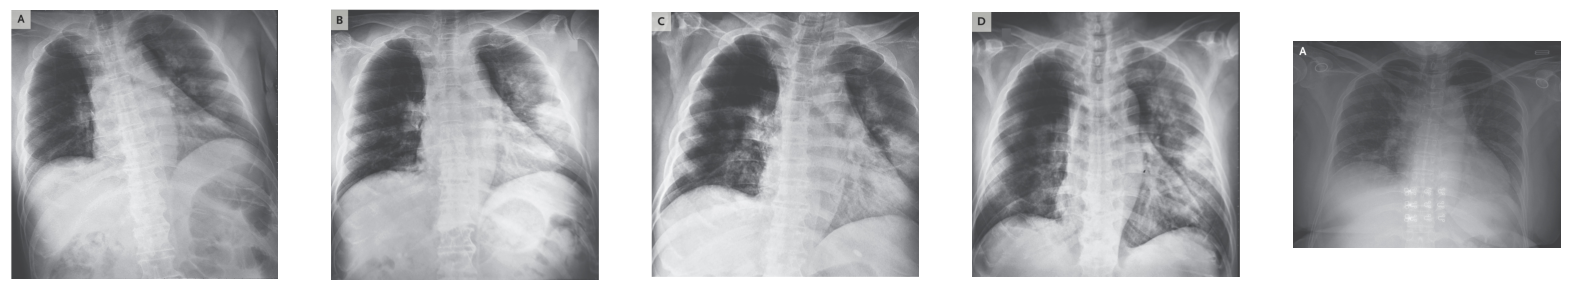

In [31]:
# visualizing the first 5 examples
fig, m_axs = plt.subplots(1, 5, figsize=(20, 10))
for idx, c_ax in enumerate(m_axs):
    c_ax.imshow(plt.imread('data/COVID-19/' + covid_files.iloc[idx]), cmap='bone')
    # c_ax.set_title(covid_files.iloc[idx])
    c_ax.axis('off')
plt.show()